<a href="https://colab.research.google.com/github/mohini111/CE888_lab/blob/main/Lab_6Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/sagihaider/CE888_2021/raw/main/Lab_6/Data/Country-data.csv
!pip install -U yellowbrick #  upgrading yellowbrick

--2021-04-30 17:40:51--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_6/Data/Country-data.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv [following]
--2021-04-30 17:40:51--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9229 (9.0K) [text/plain]
Saving to: ‘Country-data.csv’

Country-data.csv    100%[===================>]   9.01K  --.-KB/s    in 0s      

2021-04-30 17:40:51 (70.5 MB/s) - ‘Country-data.csv’ saved [9229/9229]

     |███████

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df = pd.read_csv('Country-data.csv')

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


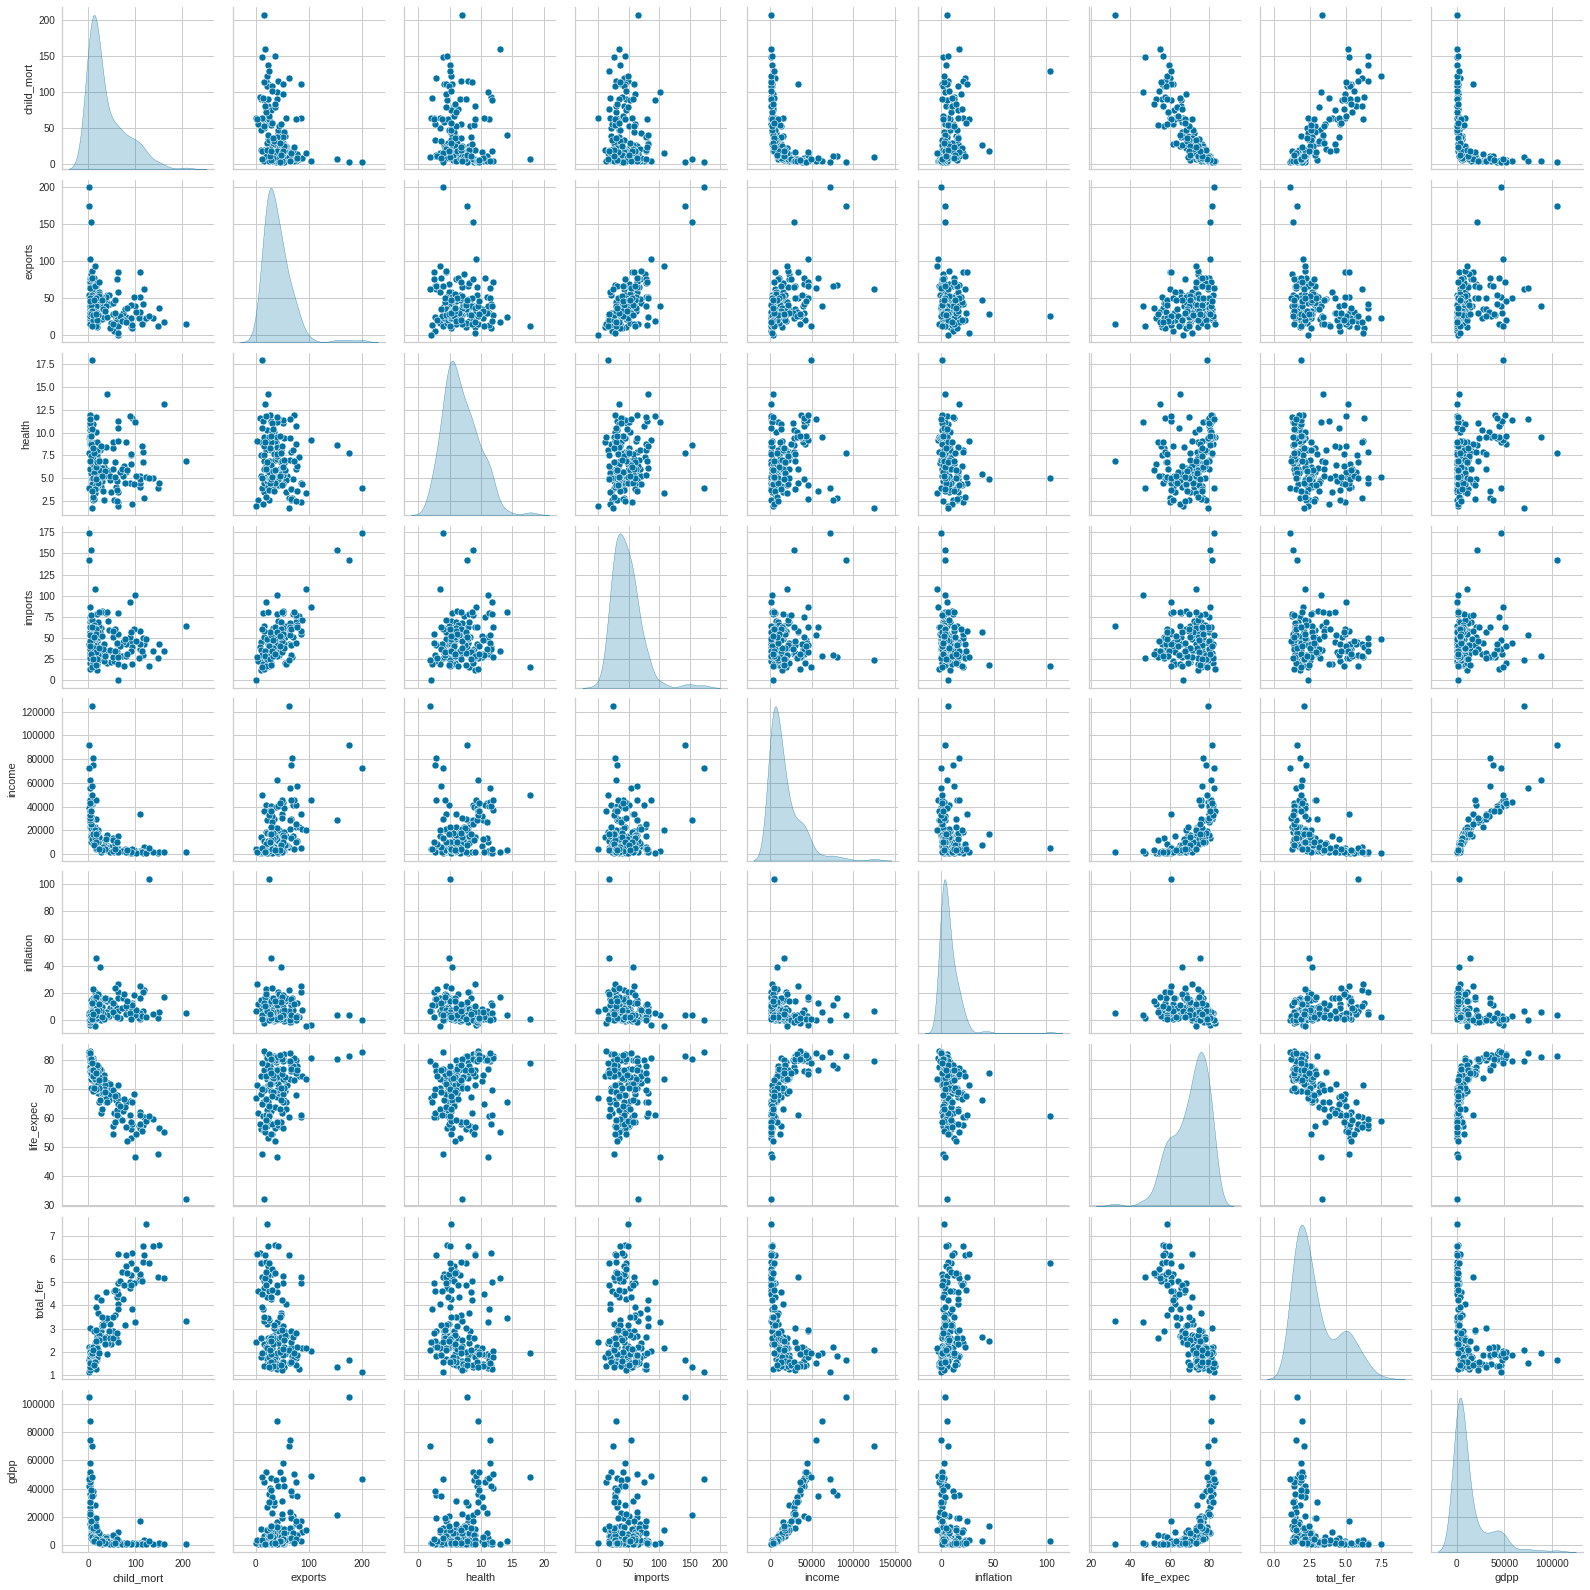

In [ ]:
sns.pairplot(df, diag_kind='kde')

In [ ]:
#  correlation
df.corr().style.background_gradient(cmap='coolwarm')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


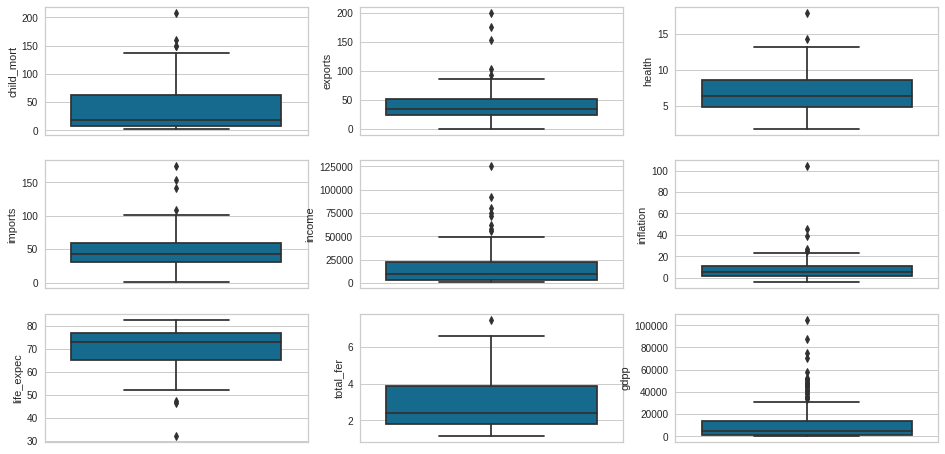

In [ ]:
#  before outlier treatment
fig, ax = plt.subplots(3, 3, figsize=(16,8))

count = 1
for i, j in itertools.product(range(3), range(3)):
    sns.boxplot(y=df.columns[count], data=df, ax=ax[i][j])
    count = count + 1

In [ ]:
#  log transformation
for col in df.columns[1:]:
    df[col] = df[col].map(lambda i: np.log(i) if i > 0 else 0)

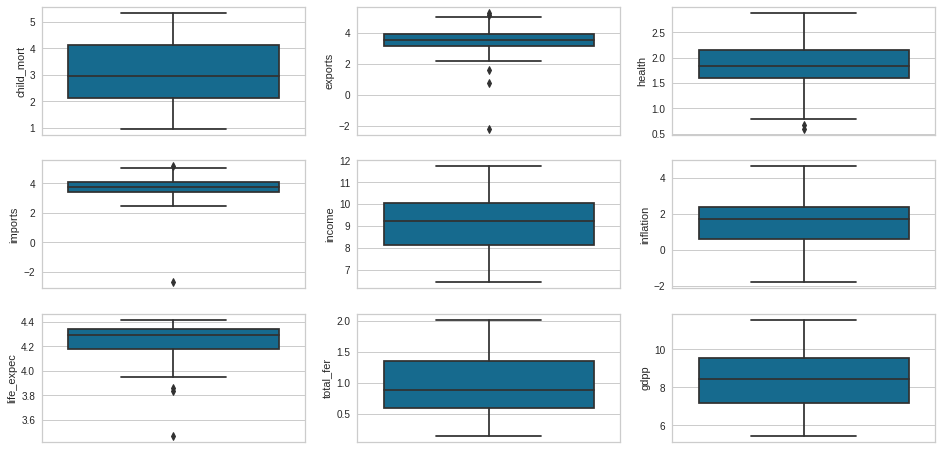

In [ ]:
#  after outlier treatment
fig, ax = plt.subplots(3, 3, figsize=(16,8))

count = 1
for i, j in itertools.product(range(3), range(3)):
    sns.boxplot(y=df.columns[count], data=df, ax=ax[i][j])
    count = count + 1

In [ ]:
#  scaling data between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
df[df.iloc[:, 1:].columns] = MinMaxScaler().fit_transform(df.iloc[:, 1:])

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.809333,0.601352,0.625007,0.828065,0.182593,0.629544,0.591048,0.865371,0.142654
1,Albania,0.423067,0.738365,0.561271,0.838116,0.524299,0.514814,0.913721,0.192663,0.469643
2,Algeria,0.536595,0.780396,0.364215,0.782673,0.573445,0.711969,0.916484,0.491777,0.483795
3,Angola,0.872567,0.844791,0.198122,0.822282,0.426518,0.762956,0.661853,0.895671,0.445580
4,Antigua and Barbuda,0.314154,0.802973,0.525173,0.862513,0.647157,0.339236,0.920615,0.328935,0.648240


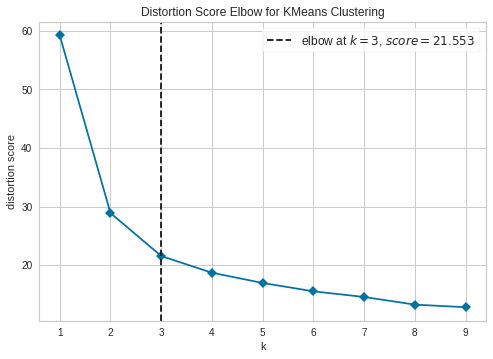

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1, 10), timings=False
)

visualizer.fit(df.iloc[:, 1:])        # Fit the data to the visualizer
visualizer.show()                     # Finalize and render the figure

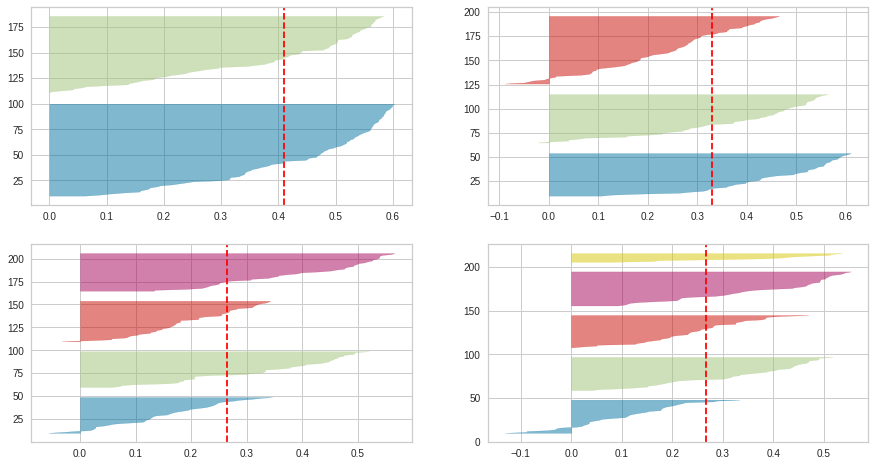

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df.iloc[:, 1:])

In [ ]:
#  Elbow method and silhouetter method suggest that the number of clusters is 3

In [ ]:
km = KMeans(n_clusters=3, random_state=42).fit(df.iloc[:, 1:])

In [ ]:
centroids = km.cluster_centers_
centroids

array([[0.15083783, 0.80219545, 0.69191793, 0.83388805, 0.73425658,
        0.31478715, 0.94993395, 0.18926592, 0.77286565],
       [0.78111149, 0.69569517, 0.50147373, 0.8006739 , 0.22297483,
        0.58584736, 0.66152382, 0.73929551, 0.21448109],
       [0.46642824, 0.78233747, 0.47578985, 0.81415528, 0.56883257,
        0.57623273, 0.85550257, 0.38097863, 0.53121422]])

In [ ]:
df['clusters'] = km.labels_

In [ ]:
df.where(df['clusters'] == 0).dropna()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
4,Antigua and Barbuda,0.314154,0.802973,0.525173,0.862513,0.647157,0.339236,0.920615,0.328935,0.648240,0.0
7,Australia,0.139913,0.692253,0.686649,0.731007,0.792453,0.305853,0.989754,0.276313,0.884849,0.0
8,Austria,0.114811,0.818939,0.787514,0.836009,0.800446,0.261968,0.970270,0.120013,0.868295,0.0
10,Bahamas,0.380910,0.768059,0.642499,0.824627,0.681236,0.282938,0.878564,0.256598,0.784002,0.0
13,Barbados,0.387430,0.784155,0.646901,0.838377,0.605492,0.107499,0.919240,0.233136,0.692551,0.0
15,Belgium,0.125185,0.871940,0.775447,0.892675,0.791087,0.380402,0.963695,0.256598,0.859343,0.0
20,Bosnia and Herzegovina,0.222730,0.746209,0.791464,0.844978,0.520284,0.334887,0.920615,0.069519,0.489201,0.0
24,Bulgaria,0.324972,0.816054,0.582087,0.849116,0.605492,0.299050,0.879993,0.166140,0.553679,0.0
29,Canada,0.175091,0.743493,0.799257,0.781046,0.789250,0.445717,0.980706,0.186155,0.870028,0.0
41,Croatia,0.170979,0.777595,0.635249,0.807221,0.656742,0.252487,0.913721,0.159298,0.664787,0.0


In [ ]:
df.where(df['clusters'] == 1).dropna()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,0.809333,0.601352,0.625007,0.828065,0.182593,0.629544,0.591048,0.865371,0.142654,1.0
3,Angola,0.872567,0.844791,0.198122,0.822282,0.426518,0.762956,0.661853,0.895671,0.445580,1.0
12,Bangladesh,0.671935,0.663896,0.290265,0.736358,0.260682,0.586431,0.828789,0.376830,0.194183,1.0
17,Benin,0.856686,0.716739,0.356827,0.804187,0.205620,0.264076,0.691290,0.821430,0.194183,1.0
25,Burkina Faso,0.866740,0.688158,0.573750,0.775180,0.160325,0.579125,0.622498,0.869936,0.149029,1.0
26,Burundi,0.817777,0.586143,0.810691,0.810834,0.042588,0.670403,0.618846,0.904265,0.000000,1.0
27,Cambodia,0.647583,0.826011,0.499078,0.863800,0.266741,0.458612,0.762277,0.489927,0.200111,1.0
28,Cameroon,0.850433,0.707478,0.454633,0.763511,0.276896,0.382846,0.611505,0.795940,0.283589,1.0
31,Central African Republic,0.923873,0.623377,0.343864,0.761139,0.070837,0.390725,0.413556,0.806283,0.107513,1.0
32,Chad,0.925399,0.774733,0.400352,0.824045,0.216642,0.569296,0.596667,0.931682,0.221698,1.0


In [ ]:
df.where(df['clusters'] == 2).dropna()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
1,Albania,0.423067,0.738365,0.561271,0.838116,0.524299,0.514814,0.913721,0.192663,0.469643,2.0
2,Algeria,0.536595,0.780396,0.364215,0.782673,0.573445,0.711969,0.916484,0.491777,0.483795,2.0
5,Argentina,0.392201,0.686062,0.653962,0.697098,0.643182,0.752254,0.906783,0.385914,0.620575,2.0
6,Armenia,0.442809,0.698809,0.387645,0.829191,0.450400,0.599486,0.871390,0.205446,0.430559,2.0
9,Azerbaijan,0.619158,0.826502,0.514180,0.729787,0.613894,0.688169,0.809119,0.273541,0.527850,2.0
...,...,...,...,...,...,...,...,...,...,...,...
157,United Arab Emirates,0.272990,0.874185,0.307285,0.872257,0.854479,0.672893,0.916484,0.259459,0.820468,2.0
160,Uruguay,0.320706,0.730030,0.667228,0.755758,0.626382,0.528620,0.915104,0.316258,0.644171,2.0
161,Uzbekistan,0.601618,0.754881,0.508954,0.770374,0.364464,0.715758,0.804527,0.379115,0.292096,2.0
163,Venezuela,0.429839,0.740721,0.435504,0.709195,0.619674,0.873718,0.901199,0.407970,0.664787,2.0
